In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("AviationData1.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Aircraft.damage','Make','Model','Engine.Type','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Injury.Severity','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")

C:\Users\agnie\AppData\Local\Temp\ipykernel_15704\3397232854.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData1.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Aircraft.damage','Make','Model','Engine.Type','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Injury.Severity','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")


In [4]:
# z kolumny 'Event.Date' wyciągamy do osobnych kolumn rok, miesiąc i dzień
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name()
df['Day'] = df['Event.Date'].dt.day_name()

# z kolumny 'Location' wyciągamy do osbnych kolumn miasto i stan
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]

# 'Unk' i 'UNK' zamieniamy na jedną wartość 'Unknown'
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True)

# wartości np. Fatal(1), Fatal(123) zamieniamy na jedną wartość 'Fatal'
df['Injury.Severity'] = df['Injury.Severity'].str.replace('Fatal.*', 'Fatal')

# puste wartości uzupełniamy najczęściej występującymi wartościami w danej kolumnie
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0])
df['Weather.Condition'] = df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0])
df['Engine.Type'] = df['Engine.Type'].fillna(df['Engine.Type'].mode()[0])
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])

# w kolumnie number.of.Engines średnia oraz mediana jest podabna, wiec uzupełniam puste wartosci medianą
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)

C:\Users\agnie\AppData\Local\Temp\ipykernel_15704\850482051.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Injury.Severity'] = df['Injury.Severity'].str.replace('Fatal.*', 'Fatal')


In [5]:
# poniższy kod zamienia wszystkie wartości NaN na 'Unavailable' albo 'Unknown' dla kolumn gdzie już takie wartości występują. 
# Dzięki temu po późniejszym zastosowaniu df.dropna() zamiast 50k rekordów zostaje aż 77k. 
# Pytanie tylko czy wartości 'Unknown' w modelu mają jakikolwiek sens i czy nie lepiej faktycznie zredukować dane do tych 50k.
'''
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
'''

"\ndf['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')\ndf['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')\ndf['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')\ndf['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')\ndf['Make'] = df['Make'].fillna('Unknown')\n"

In [6]:
df = df.dropna()

In [7]:
df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].agg(['count', 'min', 'max', 'mean', 'sum'])

,count,min,max,mean,sum
Broad.phase.of.flight,,,,,
Approach,5415,0.0,228.0,0.705263,3819.0
Climb,1649,0.0,230.0,1.056398,1742.0
Cruise,8391,0.0,111.0,0.721249,6052.0
Descent,1454,0.0,82.0,0.621733,904.0
Go-around,1116,0.0,37.0,0.524194,585.0
Landing,11614,0.0,34.0,0.042793,497.0
Maneuvering,7104,0.0,68.0,0.741132,5265.0
Other,96,0.0,11.0,0.875000,84.0
Standing,553,0.0,34.0,0.195298,108.0


In [8]:
df.isnull().sum()

Event.Id                 0
Investigation.Type       0
Event.Date               0
Location                 0
Injury.Severity          0
Aircraft.damage          0
Make                     0
Model                    0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Total.Fatal.Injuries     0
Weather.Condition        0
Broad.phase.of.flight    0
Year                     0
Month                    0
Day                      0
City                     0
State                    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49498 entries, 0 to 63909
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               49498 non-null  object        
 1   Investigation.Type     49498 non-null  object        
 2   Event.Date             49498 non-null  datetime64[ns]
 3   Location               49498 non-null  object        
 4   Injury.Severity        49498 non-null  object        
 5   Aircraft.damage        49498 non-null  object        
 6   Make                   49498 non-null  object        
 7   Model                  49498 non-null  object        
 8   Number.of.Engines      49498 non-null  float64       
 9   Engine.Type            49498 non-null  object        
 10  Purpose.of.flight      49498 non-null  object        
 11  Total.Fatal.Injuries   49498 non-null  float64       
 12  Weather.Condition      49498 non-null  object        
 13  B

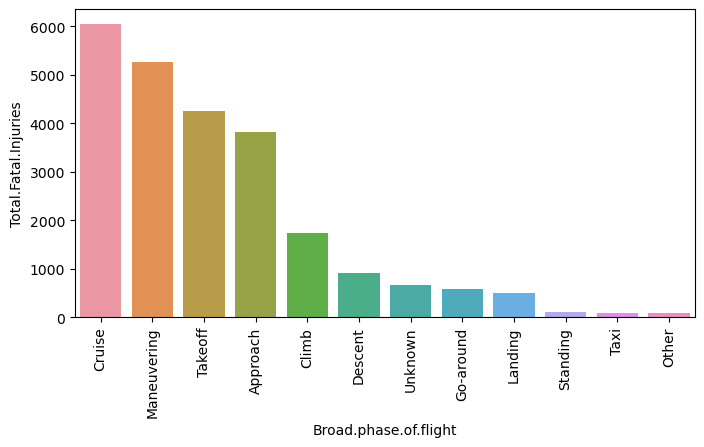

In [10]:
phase_flight_grouped= df.groupby("Broad.phase.of.flight").sum('Total.Fatal.Injuries').reset_index().sort_values(by='Total.Fatal.Injuries',ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data = phase_flight_grouped, x = phase_flight_grouped['Broad.phase.of.flight'],y= phase_flight_grouped['Total.Fatal.Injuries'], estimator = sum)
plt.xticks(rotation=90)
plt.show()

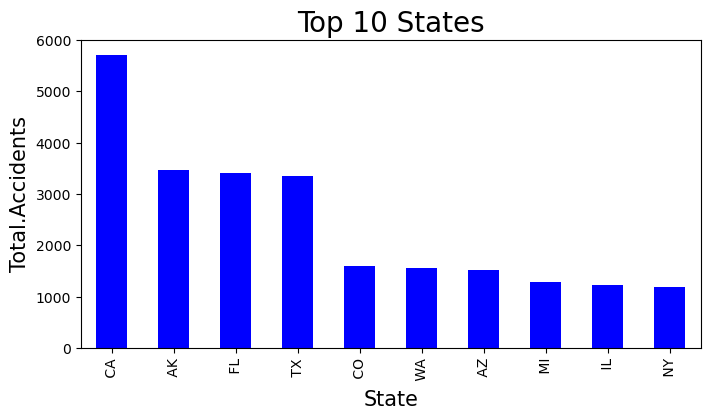

In [11]:
plt.figure(figsize=(8,4))
df['State'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xticks(rotation=90)
plt.xlabel("State", size=15)
plt.ylabel("Total.Accidents", size=15)
plt.title("Top 10 States", size=20)
plt.show()

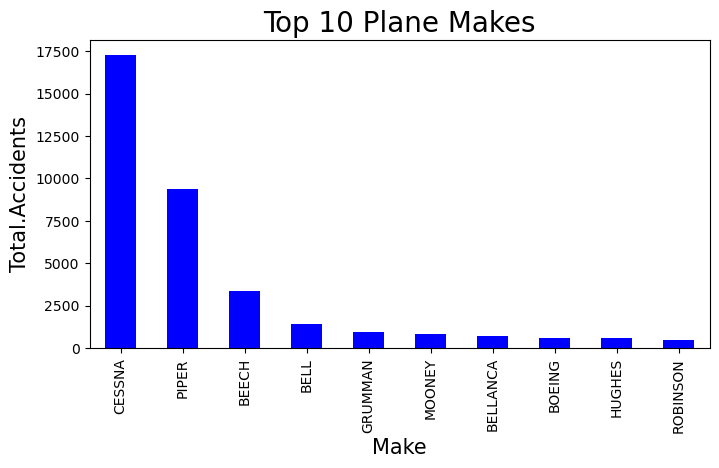

In [12]:
plt.figure(figsize=(8,4))
df['Make'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Total.Accidents", size=15)
plt.title("Top 10 Plane Makes", size=20)
plt.show()

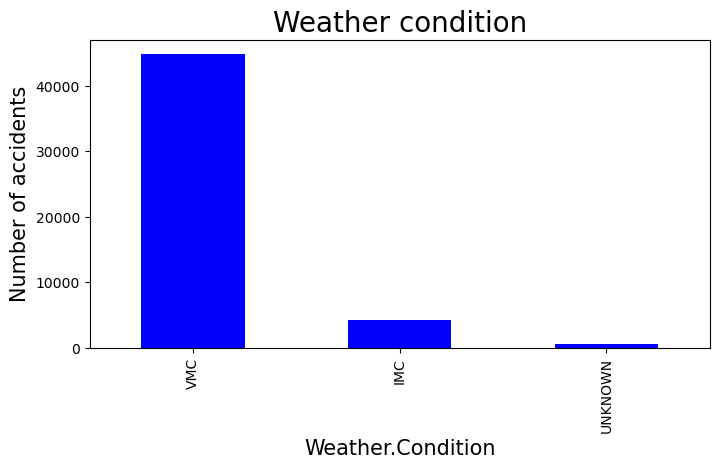

In [13]:
plt.figure(figsize=(8,4))
df['Weather.Condition'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xlabel("Weather.Condition", size=15)
plt.ylabel("Number of accidents", size=15)
plt.title("Weather condition", size=20)
plt.show()

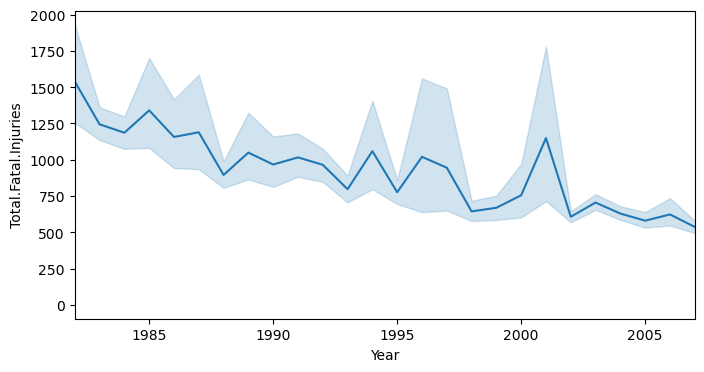

In [14]:
plt.figure(figsize = (8,4))
ax = sns.lineplot(data = df, x = df['Year'], y= df['Total.Fatal.Injuries'],estimator=sum)
ax.set_xlim(1982,2007)
plt.show()

In [ ]:
sns.barplot(data=df,x='Weather.Condition',y='Total.Fatal.Injuries',errorbar=None,estimator=sum)

In [ ]:
sns.barplot(data = df,x=df['Purpose.of.flight'],y=df['Total.Fatal.Injuries'],errorbar=None,estimator=sum)
plt.xticks(rotation=90);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49498 entries, 0 to 63909
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               49498 non-null  object        
 1   Investigation.Type     49498 non-null  object        
 2   Event.Date             49498 non-null  datetime64[ns]
 3   Location               49498 non-null  object        
 4   Injury.Severity        49498 non-null  object        
 5   Aircraft.damage        49498 non-null  object        
 6   Make                   49498 non-null  object        
 7   Model                  49498 non-null  object        
 8   Number.of.Engines      49498 non-null  float64       
 9   Engine.Type            49498 non-null  object        
 10  Purpose.of.flight      49498 non-null  object        
 11  Total.Fatal.Injuries   49498 non-null  float64       
 12  Weather.Condition      49498 non-null  object        
 13  B

In [16]:
df.loc[df['Total.Fatal.Injuries'] > 0, 'Total.Fatal.Injuries'] = 1

In [17]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Year,Month,Day,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,1.0,Unknown,Cruise,1948,October,Sunday,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,1.0,Unknown,Unknown,1962,July,Thursday,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,1.0,IMC,Cruise,1974,August,Friday,Saltville,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,1.0,IMC,Cruise,1977,June,Sunday,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,"Canton, OH",Fatal,Destroyed,Cessna,501,1.0,Reciprocating,Personal,1.0,VMC,Approach,1979,August,Thursday,Canton,OH


In [18]:
df.drop(['Event.Id', 'Investigation.Type', 'Event.Date','Location','Injury.Severity','Model','City', 'Year','Day'], axis=1, inplace=True)

In [19]:
df.head()

,Aircraft.damage,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Month,State
0,Destroyed,Stinson,1.0,Reciprocating,Personal,1.0,Unknown,Cruise,October,ID
1,Destroyed,Piper,1.0,Reciprocating,Personal,1.0,Unknown,Unknown,July,CA
2,Destroyed,Cessna,1.0,Reciprocating,Personal,1.0,IMC,Cruise,August,VA
3,Destroyed,Rockwell,1.0,Reciprocating,Personal,1.0,IMC,Cruise,June,CA
4,Destroyed,Cessna,1.0,Reciprocating,Personal,1.0,VMC,Approach,August,OH


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49498 entries, 0 to 63909
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aircraft.damage        49498 non-null  object 
 1   Make                   49498 non-null  object 
 2   Number.of.Engines      49498 non-null  float64
 3   Engine.Type            49498 non-null  object 
 4   Purpose.of.flight      49498 non-null  object 
 5   Total.Fatal.Injuries   49498 non-null  float64
 6   Weather.Condition      49498 non-null  object 
 7   Broad.phase.of.flight  49498 non-null  object 
 8   Month                  49498 non-null  object 
 9   State                  49498 non-null  object 
dtypes: float64(2), object(8)
memory usage: 5.2+ MB


In [21]:
df.columns

Index(['Aircraft.damage', 'Make', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Weather.Condition',
       'Broad.phase.of.flight', 'Month', 'State'],
      dtype='object')

In [22]:
X = df[['Aircraft.damage', 'Make', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Weather.Condition',
       'Broad.phase.of.flight', 'Month', 'State']]

In [23]:
X.head()

,Aircraft.damage,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Month,State
0,Destroyed,Stinson,1.0,Reciprocating,Personal,Unknown,Cruise,October,ID
1,Destroyed,Piper,1.0,Reciprocating,Personal,Unknown,Unknown,July,CA
2,Destroyed,Cessna,1.0,Reciprocating,Personal,IMC,Cruise,August,VA
3,Destroyed,Rockwell,1.0,Reciprocating,Personal,IMC,Cruise,June,CA
4,Destroyed,Cessna,1.0,Reciprocating,Personal,VMC,Approach,August,OH


In [24]:
X_cat = pd.get_dummies(X, columns=['Aircraft.damage'], drop_first=True)

In [25]:
X_cat.head()

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Month,State,Aircraft.damage_Minor,Aircraft.damage_Substantial
0,Stinson,1.0,Reciprocating,Personal,Unknown,Cruise,October,ID,0,0
1,Piper,1.0,Reciprocating,Personal,Unknown,Unknown,July,CA,0,0
2,Cessna,1.0,Reciprocating,Personal,IMC,Cruise,August,VA,0,0
3,Rockwell,1.0,Reciprocating,Personal,IMC,Cruise,June,CA,0,0
4,Cessna,1.0,Reciprocating,Personal,VMC,Approach,August,OH,0,0


In [26]:
X_cat = pd.get_dummies(X, columns=['Aircraft.damage','Make','Number.of.Engines', 'Engine.Type','Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight','Month','State'], drop_first=True)

In [27]:
X_cat.head()

,Aircraft.damage_Minor,Aircraft.damage_Substantial,Make_2000 Mccoy,Make_67 Flying Dutchman,Make_85 Manista,Make_A. H. Gettings,Make_A. Le Francois,Make_Aaa Aircraft Leasing,Make_Ab Sportine Aviacija,Make_Abbott,...,State_ VT,State_ Venezuela,State_ WA,State_ WI,State_ WV,State_ WY,State_Kauai,State_MAUI,State_MOLOKAI,State_OAHU
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y_cat = df[['Total.Fatal.Injuries']]

In [29]:
new_df = pd.concat([X_cat, y_cat], axis=1, join='inner')

In [30]:
new_df.head()

,Aircraft.damage_Minor,Aircraft.damage_Substantial,Make_2000 Mccoy,Make_67 Flying Dutchman,Make_85 Manista,Make_A. H. Gettings,Make_A. Le Francois,Make_Aaa Aircraft Leasing,Make_Ab Sportine Aviacija,Make_Abbott,...,State_ Venezuela,State_ WA,State_ WI,State_ WV,State_ WY,State_Kauai,State_MAUI,State_MOLOKAI,State_OAHU,Total.Fatal.Injuries
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [31]:
new_df['Total.Fatal.Injuries'].unique()

array([1., 0.])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [48]:
from lazypredict.Supervised import LazyClassifier

In [33]:
X_model = new_df.drop(['Total.Fatal.Injuries'], axis=1)


In [34]:
y = new_df['Total.Fatal.Injuries']

In [35]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Total.Fatal.Injuries, dtype: float64

In [36]:
X_model_train, X_model_test, y_train, y_test = train_test_split(X_model, y, random_state=123, test_size=0.3)

In [55]:
X_model.shape

(49498, 3705)

In [59]:
X_model_train.shape

(34648, 3705)

In [60]:
y_train.shape

(34648,)

In [62]:
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = lazy_clf.fit(X_model_train, X_model_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [3:50:13<00:00, 476.32s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.87,0.86,0.86,0.87,122.40
RidgeClassifier,0.87,0.85,0.85,0.88,36.61
RidgeClassifierCV,0.87,0.85,0.85,0.88,160.15
LinearSVC,0.88,0.84,0.84,0.88,286.55
NearestCentroid,0.85,0.83,0.83,0.85,9.60
SVC,0.86,0.83,0.83,0.86,4388.86
AdaBoostClassifier,0.88,0.83,0.83,0.88,194.34
SGDClassifier,0.87,0.83,0.83,0.87,75.24
XGBClassifier,0.88,0.83,0.83,0.88,283.10


In [37]:
from xgboost import XGBClassifier

In [38]:
tree= DecisionTreeClassifier(random_state=123) 
forest= RandomForestClassifier(random_state=123)
svm= SVC(random_state=123)
xboost= XGBClassifier(random_state=123)

In [39]:
models= [tree, forest, svm, xboost]

for model in models:
    model.fit(X_model_train, y_train) # fit the model
    y_pred= model.predict(X_model_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) 
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model DecisionTreeClassifier is 0.84
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     11499
         1.0       0.65      0.64      0.65      3351

    accuracy                           0.84     14850
   macro avg       0.77      0.77      0.77     14850
weighted avg       0.84      0.84      0.84     14850



The accuracy of model RandomForestClassifier is 0.87
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     11499
         1.0       0.74      0.65      0.69      3351

    accuracy                           0.87     14850
   macro avg       0.82      0.79      0.80     14850
weighted avg       0.86      0.87      0.87     14850



The accuracy of model SVC is 0.88
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     11499
         1.0       0.72      0.78      0.75      3351

    accuracy                          